![](img/logo.png)

# Movies
## Yoav Ram

In this session we will practice Pandas and Scikit-learn skills to explore a movies dataset and provide movie recommendations.

The data we use is the [MovieLens](http://movielens.org) dataset, available [here](https://grouplens.org/datasets/movielens/)

In [156]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
print('Pandas version:', pd.__version__)

import os
import urllib.request
import zipfile

Pandas version: 0.25.3


# Download and extract files

In [2]:
url = "http://files.grouplens.org/datasets/movielens/ml-latest-small.zip"
zfname = "../data/movielens.zip"
path = '../data/movies/'

In [3]:
if not os.path.exists(zfname):
    print('Downloading from', url)
    urllib.request.urlretrieve(url, zfname)

In [4]:
with zipfile.ZipFile(zfname) as z:
    z.extractall(path)

In [5]:
path += '/ml-latest-small/'
%ls $path

README.txt   links.csv    movies.csv   ratings.csv  tags.csv


# Movies dataset

The main file contains the titles and genres of movies.

In [164]:
movies = pd.read_csv(path + 'movies.csv', index_col='movieId')
movies.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


We split the genres to a list.

In [165]:
movies['genres'] = movies['genres'].str.split('|')
movies.head()

,title,genres
movieId,,
1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
2,Jumanji (1995),"[Adventure, Children, Fantasy]"
3,Grumpier Old Men (1995),"[Comedy, Romance]"
4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
5,Father of the Bride Part II (1995),[Comedy]


Create a list of genres.

In [166]:
genres = set()
for gen in movies['genres']:
    genres.update(gen)
genres = sorted(genres)
genres

['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

Create genre columns on the movies data frame.

Start by setting all genres to 0.

In [167]:
for gen in genres:
    movies[gen] = 0
movies.head()    

,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),"[Adventure, Children, Fantasy]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),"[Comedy, Romance]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Father of the Bride Part II (1995),[Comedy],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Set genres to 1 if applicable.

In [168]:
for i, row in movies.iterrows():
    movies.loc[i, row['genres']] = 1
movies.head()

,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),"[Adventure, Children, Fantasy]",0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),"[Comedy, Romance]",0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II (1995),[Comedy],0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Create new columns for movie name and year.

In [169]:
title_year_pattern = '(?P<name>.*) \((?P<year>\d\d\d\d)\)'
title_year = movies['title'].str.extract(title_year_pattern)
title_year.head()

,name,year
movieId,,
1,Toy Story,1995
2,Jumanji,1995
3,Grumpier Old Men,1995
4,Waiting to Exhale,1995
5,Father of the Bride Part II,1995


In [170]:
movies['name'] = title_year['name']
movies['year'] = title_year['year']
movies.sort_index(ascending=False, axis=1, inplace=True)
movies.head()

,year,title,name,genres,Western,War,Thriller,Sci-Fi,Romance,Mystery,...,Fantasy,Drama,Documentary,Crime,Comedy,Children,Animation,Adventure,Action,(no genres listed)
movieId,,,,,,,,,,,,,,,,,,,,,
1,1995,Toy Story (1995),Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,0,0,0,0,...,1,0,0,0,1,1,1,1,0,0
2,1995,Jumanji (1995),Jumanji,"[Adventure, Children, Fantasy]",0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
3,1995,Grumpier Old Men (1995),Grumpier Old Men,"[Comedy, Romance]",0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,1995,Waiting to Exhale (1995),Waiting to Exhale,"[Comedy, Drama, Romance]",0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
5,1995,Father of the Bride Part II (1995),Father of the Bride Part II,[Comedy],0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# Ratings dataset

The ratings dataset contains the movie ratings by users.

In [171]:
ratings = pd.read_csv(path + 'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


We convert the timestamp to a date using [`pandas.to_datetime`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html).

In [172]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51


# Ratings summary

We summarize the ratings with mean, standard deviation, and count of ratings per movie.

For this, we use `groupby` and `agg`.

In [173]:
grp = ratings.groupby('movieId')
movies_stats = grp.agg({'rating': [np.mean, np.std, np.size]})
movies['rating_mean'] = movies_stats['rating']['mean'] # column names with two levels
movies['rating_std'] = movies_stats['rating']['std']
movies['rating_count'] = movies_stats['rating']['size']
movies.head()

,year,title,name,genres,Western,War,Thriller,Sci-Fi,Romance,Mystery,...,Crime,Comedy,Children,Animation,Adventure,Action,(no genres listed),rating_mean,rating_std,rating_count
movieId,,,,,,,,,,,,,,,,,,,,,
1,1995,Toy Story (1995),Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,0,0,0,0,...,0,1,1,1,1,0,0,3.920930,0.834859,215.0
2,1995,Jumanji (1995),Jumanji,"[Adventure, Children, Fantasy]",0,0,0,0,0,0,...,0,0,1,0,1,0,0,3.431818,0.881713,110.0
3,1995,Grumpier Old Men (1995),Grumpier Old Men,"[Comedy, Romance]",0,0,0,0,1,0,...,0,1,0,0,0,0,0,3.259615,1.054823,52.0
4,1995,Waiting to Exhale (1995),Waiting to Exhale,"[Comedy, Drama, Romance]",0,0,0,0,1,0,...,0,1,0,0,0,0,0,2.357143,0.852168,7.0
5,1995,Father of the Bride Part II (1995),Father of the Bride Part II,[Comedy],0,0,0,0,0,0,...,0,1,0,0,0,0,0,3.071429,0.907148,49.0


# Best rated movies

Lets find the 10 best rated movies. We sort the data frame on `rating_mean` and take the top 10.

In [174]:
movies.sort_values('rating_mean', ascending=False)[:10][['name', 'rating_mean', 'rating_std', 'rating_count']]

,name,rating_mean,rating_std,rating_count
movieId,,,,
88448,Paper Birds (Pájaros de papel),5.0,NaN,1.0
100556,"Act of Killing, The",5.0,NaN,1.0
143031,Jump In!,5.0,NaN,1.0
143511,Human,5.0,NaN,1.0
143559,L.A. Slasher,5.0,NaN,1.0
6201,Lady Jane,5.0,NaN,1.0
102217,Bill Hicks: Revelations,5.0,NaN,1.0
102084,Justice League: Doom,5.0,NaN,1.0
6192,Open Hearts (Elsker dig for evigt),5.0,NaN,1.0


Seems like the top rated movies only have a single vote.

Check the joint distribution of rating means and counts.

Text(0.5, 1.0, 'Mean rating vs. number of ratings')

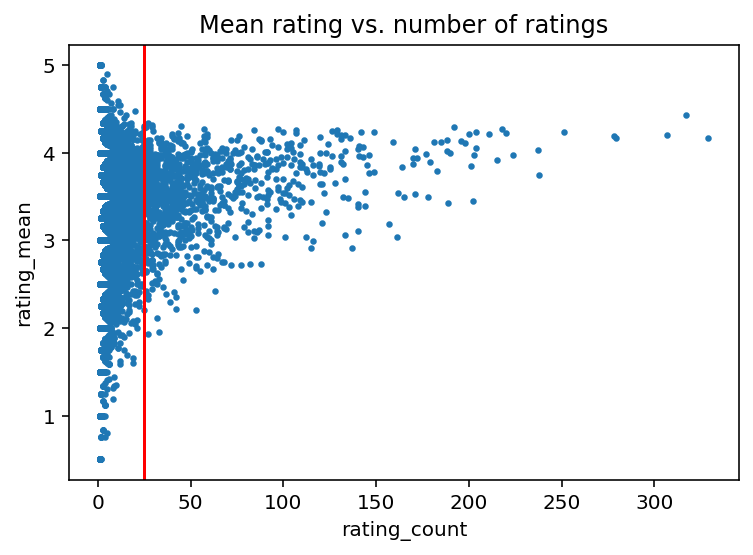

In [175]:
movies.plot.scatter('rating_count', 'rating_mean', marker='.')
plt.axvline(25, color='red')
plt.title('Mean rating vs. number of ratings')

It seems like after 25 votes the rating become stable, with a reasonable increase in rating mean with number of votes (more people will watch and vote for highly rated movies).

We focus on movies with at least 25 votes, then.

In [176]:
enough_ratings = movies['rating_count'] >= 25
movies_rate_mean_sorted = movies[enough_ratings].sort_values('rating_mean', ascending=False)
movies_rate_mean_sorted[:10][['name', 'rating_mean', 'rating_std', 'rating_count']]

,name,rating_mean,rating_std,rating_count
movieId,,,,
318,"Shawshank Redemption, The",4.429022,0.713019,317.0
922,Sunset Blvd. (a.k.a. Sunset Boulevard),4.333333,0.665062,27.0
898,"Philadelphia Story, The",4.310345,0.783921,29.0
475,In the Name of the Father,4.300000,0.629153,25.0
1204,Lawrence of Arabia,4.300000,0.835301,45.0
246,Hoop Dreams,4.293103,0.762014,29.0
858,"Godfather, The",4.289062,0.904344,192.0
1235,Harold and Maude,4.288462,0.709550,26.0
168252,Logan,4.280000,0.646787,25.0


This makes more sense, but still most of the movies here are bearly over the threshold. 
Lets try again.

In [177]:
enough_ratings = movies['rating_count'] >= 100
movies_rate_mean_sorted = movies[enough_ratings].sort_values('rating_mean', ascending=False)
movies_rate_mean_sorted[:10][['name', 'rating_mean', 'rating_std', 'rating_count']]

,name,rating_mean,rating_std,rating_count
movieId,,,,
318,"Shawshank Redemption, The",4.429022,0.713019,317.0
858,"Godfather, The",4.289062,0.904344,192.0
2959,Fight Club,4.272936,0.861384,218.0
1221,"Godfather: Part II, The",4.259690,0.803072,129.0
48516,"Departed, The",4.252336,0.691504,107.0
1213,Goodfellas,4.250000,0.683374,126.0
912,Casablanca,4.240000,0.900281,100.0
58559,"Dark Knight, The",4.238255,0.724997,149.0
50,"Usual Suspects, The",4.237745,0.800921,204.0


This looks better.

Maybe count of rankings is more important then the average ratings?

In [178]:
movies_rate_count_sorted = movies.sort_values('rating_count', ascending=False)
movies_rate_count_sorted[:10][['title', 'rating_mean', 'rating_std', 'rating_count']]

,title,rating_mean,rating_std,rating_count
movieId,,,,
356,Forrest Gump (1994),4.164134,0.831244,329.0
318,"Shawshank Redemption, The (1994)",4.429022,0.713019,317.0
296,Pulp Fiction (1994),4.197068,0.951997,307.0
593,"Silence of the Lambs, The (1991)",4.161290,0.853983,279.0
2571,"Matrix, The (1999)",4.192446,0.975243,278.0
260,Star Wars: Episode IV - A New Hope (1977),4.231076,0.872004,251.0
480,Jurassic Park (1993),3.750000,0.855301,238.0
110,Braveheart (1995),4.031646,0.967726,237.0
589,Terminator 2: Judgment Day (1991),3.970982,0.926833,224.0


# Genre rating

What genres recieve the highest ranking?

In [180]:
genre_rating = []
genre_count = []
for gen in genres:
    idx = movies[gen] == 1
    mean = movies.loc[idx, 'rating_mean']
    count = movies.loc[idx, 'rating_count']
    genre_rating.append( (mean * count).sum() / count.sum() )
    genre_count.append( count.sum() )
    
genre_rating = pd.DataFrame({'genre': genres, 'rating_mean': genre_rating, 'rating_count': genre_count})
genre_rating.sort_values('rating_mean', ascending=False)[:5]

,genre,rating_mean,rating_count
10,Film-Noir,3.920115,870.0
18,War,3.808294,4859.0
7,Documentary,3.797785,1219.0
6,Crime,3.658294,16681.0
8,Drama,3.656184,41928.0


Again, the best rated genres are those with the fewest ratings.

In [181]:
genre_rating.sort_values('rating_count', ascending=False)[:5]

,genre,rating_mean,rating_count
8,Drama,3.656184,41928.0
5,Comedy,3.384721,39053.0
1,Action,3.447984,30635.0
17,Thriller,3.493706,26452.0
2,Adventure,3.508609,24161.0


# Recommend movies

First, we merge the movies and ratings data frames on the `movieId` column.

In [182]:
movies_full = pd.merge(movies, ratings, on='movieId')
movies_full.head()

,movieId,year,title,name,genres,Western,War,Thriller,Sci-Fi,Romance,...,Animation,Adventure,Action,(no genres listed),rating_mean,rating_std,rating_count,userId,rating,timestamp
0,1,1995,Toy Story (1995),Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,0,0,0,...,1,1,0,0,3.92093,0.834859,215.0,1,4.0,2000-07-30 18:45:03
1,1,1995,Toy Story (1995),Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,0,0,0,...,1,1,0,0,3.92093,0.834859,215.0,5,4.0,1996-11-08 06:36:02
2,1,1995,Toy Story (1995),Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,0,0,0,...,1,1,0,0,3.92093,0.834859,215.0,7,4.5,2005-01-25 06:52:26
3,1,1995,Toy Story (1995),Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,0,0,0,...,1,1,0,0,3.92093,0.834859,215.0,15,2.5,2017-11-13 12:59:30
4,1,1995,Toy Story (1995),Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,0,0,0,...,1,1,0,0,3.92093,0.834859,215.0,17,4.5,2011-05-18 05:28:03


We now have one row for every rating, with full info of the movie at question.

We normalize each rating around the mean movie rating, so that we know which users liked or disliked a movie more than the average user. 

In [183]:
movies_full['rating'] -= movies_full['rating_mean']
movies_full.head()

,movieId,year,title,name,genres,Western,War,Thriller,Sci-Fi,Romance,...,Animation,Adventure,Action,(no genres listed),rating_mean,rating_std,rating_count,userId,rating,timestamp
0,1,1995,Toy Story (1995),Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,0,0,0,...,1,1,0,0,3.92093,0.834859,215.0,1,0.07907,2000-07-30 18:45:03
1,1,1995,Toy Story (1995),Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,0,0,0,...,1,1,0,0,3.92093,0.834859,215.0,5,0.07907,1996-11-08 06:36:02
2,1,1995,Toy Story (1995),Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,0,0,0,...,1,1,0,0,3.92093,0.834859,215.0,7,0.57907,2005-01-25 06:52:26
3,1,1995,Toy Story (1995),Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,0,0,0,...,1,1,0,0,3.92093,0.834859,215.0,15,-1.42093,2017-11-13 12:59:30
4,1,1995,Toy Story (1995),Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,0,0,0,...,1,1,0,0,3.92093,0.834859,215.0,17,0.57907,2011-05-18 05:28:03


Take only movies rates at least 25 times.

In [184]:
highly_rated = movies_full['rating_count'] >= 25
movies_full = movies_full[highly_rated]

This is an important step: we __pivot__ the data frame to get a table where element at row `i` and column `j` is the rating of user `j` for movie `i`. 

This table will be the input for our machine learning algorithm: each row is a sample (movie), each column is a feature (user rating).

In [185]:
movies_user_rating = movies_full.pivot(
    index='movieId',
    columns='userId',
    values='rating'
).fillna(0)
movies_user_rating.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.079070,0.0,0.0,0.0,0.07907,0.000000,0.57907,0.000000,0.0,0.0,...,0.07907,0.000000,0.079070,-0.920930,0.079070,-1.42093,0.07907,-1.420930,-0.92093,1.079070
2,0.000000,0.0,0.0,0.0,0.00000,0.568182,0.00000,0.568182,0.0,0.0,...,0.00000,0.568182,0.000000,1.568182,0.068182,0.00000,0.00000,-1.431818,0.00000,0.000000
3,0.740385,0.0,0.0,0.0,0.00000,1.740385,0.00000,0.000000,0.0,0.0,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,-1.259615,0.00000,0.000000
5,0.000000,0.0,0.0,0.0,0.00000,1.928571,0.00000,0.000000,0.0,0.0,...,0.00000,0.000000,0.000000,-0.071429,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000
6,0.053922,0.0,0.0,0.0,0.00000,0.053922,0.00000,0.000000,0.0,0.0,...,0.00000,-0.946078,0.053922,-0.946078,0.000000,0.00000,0.00000,0.000000,0.00000,1.053922


Train a kNN model on the movies-user-rating table.

In [186]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)

In [187]:
knn.fit(movies_user_rating)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
                 radius=1.0)

The recommend function takes a movie title and number of recommendations `k` and:
1. find the `movieId` for that movie title
1. extract the features (user ratings) for that movie. The features must be a 2D array, hence the `values.reshape(...)` call.
1. finds the `k+1` nearest neighbors and their distances, and discards of the nearest neighbor, which is the movie itself (as it was part of the training set).
1. finds the `movieId` and title for each recommendation.
1. prints the results!

In [150]:
def recommend(title, k=3):
    movieId = movies[movies['title'].str.startswith(title)].index[0]
    user_rating = movies_user_rating.loc[movieId].values.reshape((1, -1))

    distances, indices = knn.kneighbors(user_rating, k+1)
    distances = distances.squeeze()[1:]
    indices = indices.squeeze()[1:]
    
    recommended_movieIds = movies_user_rating.index[indices]
    titles = movies.loc[recommended_movieIds, 'title'].values
    
    for i, d, t in zip(range(1, k+1), distances, titles):
        print('{}. {} <{:.3f}>'.format(i, t, d))

Lets try it with some favorite movies:

In [188]:
recommend('Toy Story')

1. Toy Story 2 (1999) <0.681>
2. Finding Nemo (2003) <0.682>
3. Aladdin (1992) <0.683>


In [189]:
recommend('Toy Story 2')

1. Toy Story (1995) <0.681>
2. Jaws (1975) <0.732>
3. RoboCop (1987) <0.738>


In [190]:
recommend('Iron Man', 10)

1. Star Trek (2009) <0.550>
2. Iron Man 2 (2010) <0.583>
3. District 9 (2009) <0.616>
4. Ratatouille (2007) <0.622>
5. Grindhouse (2007) <0.627>
6. Dark Knight, The (2008) <0.679>
7. Avengers, The (2012) <0.681>
8. Zootopia (2016) <0.690>
9. Batman Begins (2005) <0.692>
10. WALL·E (2008) <0.699>


In [191]:
recommend('Iron Man 2', 10)

1. Iron Man (2008) <0.583>
2. Harry Potter and the Half-Blood Prince (2009) <0.628>
3. Thor (2011) <0.634>
4. Toy Story 3 (2010) <0.646>
5. Star Trek Into Darkness (2013) <0.656>
6. X-Men Origins: Wolverine (2009) <0.666>
7. Superman Returns (2006) <0.679>
8. Iron Man 3 (2013) <0.683>
9. Captain America: The First Avenger (2011) <0.684>
10. The Hunger Games (2012) <0.692>


In [192]:
recommend('Iron Man 3', 10)

1. Avengers: Age of Ultron (2015) <0.372>
2. Avengers, The (2012) <0.491>
3. Amazing Spider-Man, The (2012) <0.499>
4. Brave (2012) <0.533>
5. Dodgeball: A True Underdog Story (2004) <0.534>
6. Wolf of Wall Street, The (2013) <0.562>
7. Django Unchained (2012) <0.582>
8. Captain America: The First Avenger (2011) <0.597>
9. Interstellar (2014) <0.620>
10. Rise of the Planet of the Apes (2011) <0.634>


# Colophon
This notebook was written by [Yoav Ram](http://python.yoavram.com).

The notebook was written using [Python](http://python.org/) 3.7.
Dependencies listed in [environment.yml](../environment.yml).

This work is licensed under a CC BY-NC-SA 4.0 International License.

![Python logo](https://www.python.org/static/community_logos/python-logo.png)